In [4]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 


In [5]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
X=df[['pclass','sex','age','sibsp', 'parch', 'fare']]
y=df['survived']

In [7]:
X = pd.get_dummies(X,columns=["sex"])

In [8]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [9]:
X.age.fillna(value=X['age'].mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5860\1520641283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value=X['age'].mean(),inplace=True)


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [11]:
model = DecisionTreeClassifier()

In [12]:
model.fit(X,y)

DecisionTreeClassifier()

In [13]:
pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [15]:
acc= accuracy_score(y_test,pred)
acc

0.9888268156424581

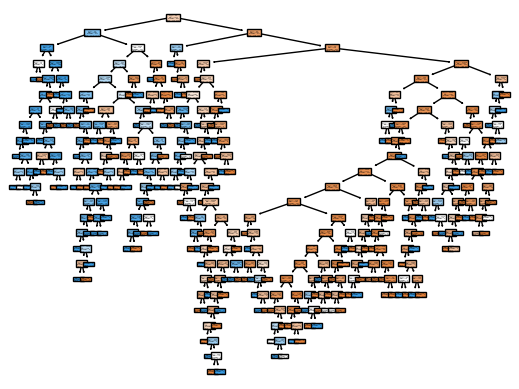

<Figure size 640x480 with 0 Axes>

In [16]:
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("Tree.png")

# KNN

In [17]:
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model1=KNeighborsClassifier()
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)
cm = confusion_matrix(y_test,y_pred1)

In [19]:
cm

array([[84, 23],
       [24, 48]], dtype=int64)

Text(0.5, 23.52222222222222, 'predicted Label')

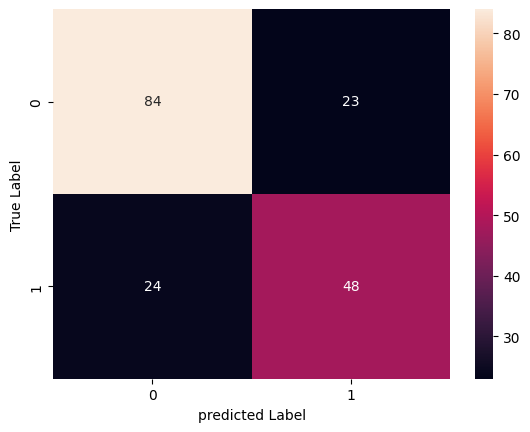

In [20]:
sns.heatmap(cm,annot=True)
plt.ylabel('True Label')
plt.xlabel('predicted Label')

In [23]:
from sklearn.metrics import precision_score

In [24]:
precision_score(y_test,y_pred1)

0.676056338028169

Text(0.5, 23.52222222222222, 'predicted Label')

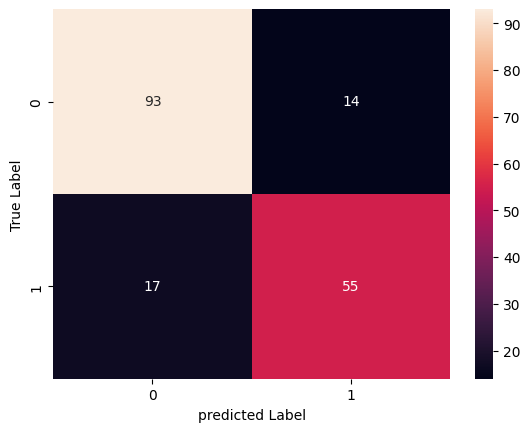

In [28]:
from sklearn.ensemble import RandomForestClassifier

model1=RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)
plt.ylabel('True Label')
plt.xlabel('predicted Label')